# Explore here

In [54]:
import os
import seaborn as sns
from sqlalchemy import create_engine
import pandas as pd
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials


In [55]:
# load .env
load_dotenv()
c_id = os.environ.get('CLIENT_ID')
c_secret = os.environ.get('CLIENT_SECRET')

In [56]:
# Connect with API
con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = c_id, client_secret = c_secret))
art_id = '6rX8AFY10dsJkJsv23Z9Um' 

Top 3 tracks:
    duration_ms      name  popularity
0     5.667767   Themata          46
1     4.632883   Goliath          40
3     5.839333  C.O.T.E.          40


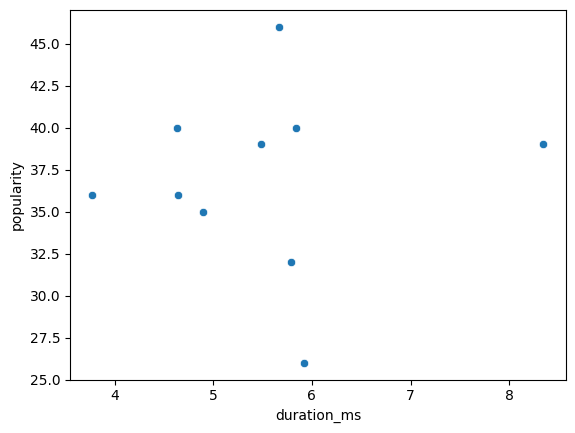

In [57]:
# Get top 10, top 3 tracks and analyze
try:
    response = con.artist_top_tracks(art_id)
    if response:
        tracks = response["tracks"]
        tracks = [{k: (v / (1000 * 60)) % 60 if k == "duration_ms" else v for k, v in track.items() if k in
                   ["name", "popularity", "duration_ms"]} for track in tracks]

        # Save it in dataframe
        df = pd.DataFrame.from_records(tracks)
        df.sort_values(["popularity"], inplace=True, ascending=False)

        print('Top 3 tracks:\n', df.head(3))

        # Show scatterplot
        scatter_plot = sns.scatterplot(data=df, x="duration_ms", y="popularity")
        fig = scatter_plot.get_figure()
        fig.savefig("scatter_plot.png")
    else:
        print("No response received from Spotify API.")
except Exception as e:
    print("An error occurred:", e)

There doesn't seem to be any relationship between the duration of the track and its popularity. But I've chosen progressive rock, which is a very specific genre with very long songs. Let's now see if another similar artist, but with shorter songs, is more popular

In [58]:
# Get top 10, top 3 tracks from other artist and compare
art_id2 = '7jy3rLJdDQY21OgRLCZ9sD'
try:
    response2 = con.artist_top_tracks(art_id2)
    if response2:
        tracks2 = response2["tracks"]
        tracks2 = [{k: (v / (1000 * 60)) % 60 if k == "duration_ms" else v for k, v in track2.items() if k in
                   ["name", "popularity", "duration_ms"]} for track2 in tracks2]

        # Save it in dataframe
        df2 = pd.DataFrame.from_records(tracks2)
        df2.sort_values(["popularity"], inplace=True, ascending=False )

        print('Top 3 tracks:\n', df2.head(3))
    else:
        print("No response received from Spotify API.")
except Exception as e:
    print("An error occurred:", e)

Top 3 tracks:
    duration_ms           name  popularity
0     4.175767       Everlong          85
1     4.489550  The Pretender          79
2     4.333767        My Hero          78


<Axes: xlabel='duration_ms', ylabel='popularity'>

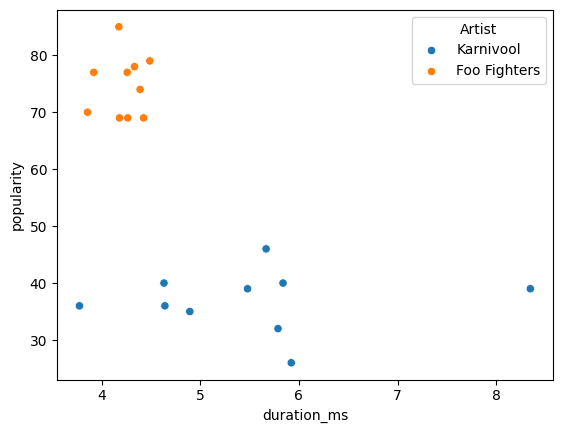

In [59]:
df['Artist'] = 'Karnivool'
df2['Artist'] = 'Foo Fighters'
df_combined = pd.concat([df, df2])

sns.scatterplot(data=df_combined, x="duration_ms", y="popularity",hue="Artist")

It seems that shorter songs lead to more popularity, but this is inconclusive, as there are many factors that can affect popularity, such as language, country of origin, or marketing strategy. Let's do the same with a playlist of the rock genre, featuring many different artists

Playlist: The Rock List


Playlist: misfits 2.0




Text(0, 0.5, 'Popularity')

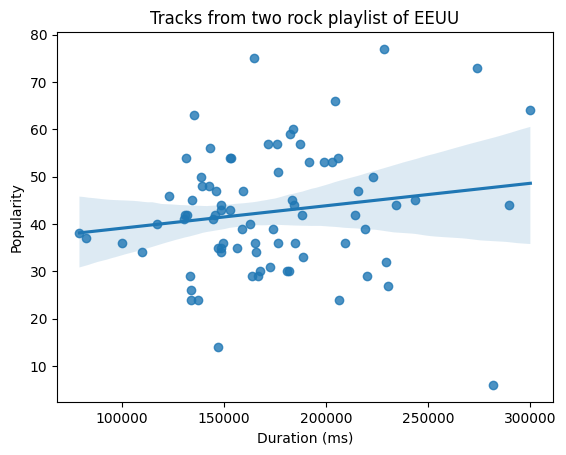

In [60]:
gen = '0JQ5DAqbMKFDXXwE9BDJAr'
try:
    response3 = con.category_playlists(category_id=gen, country='US', limit=2) # Get two playlist
    if response3:
        playlists = response3['playlists']['items'] #get playlist names
        for playlist in playlists:
            playlist_id = playlist['id']
            playlist_name = playlist['name']
            print(f"Playlist: {playlist_name}")
            response_tracks = con.playlist_tracks(playlist_id=playlist_id) # get tracks from my two playlists
            if response_tracks:
                tracks = response_tracks['items']
                durations= []
                popularity = []
                for track in tracks:
                    track_name = track['track']['name']
                    artist_name = track['track']['artists'][0]['name'] 
                    track_id = track['track']['id']
                    track_info = con.track(track_id)
                    duration_ms = track_info['duration_ms']
                    pop = track_info['popularity']
                    durations.append(duration_ms)
                    popularity.append(pop)
            else:
                print(f"No tracks found for playlist: {playlist_name}")
            print("\n")
    else:
        print("No response received from Spotify API.")
except Exception as e:
    print("An error occurred:", e)

data = {
    'Duration': durations,
    'Popularity': popularity
}

df = pd.DataFrame(data)

# Scatter plot
scatter_plot = sns.regplot(data=df, x='Duration', y='Popularity')
scatter_plot.set_title('Tracks from two rock playlist of EEUU')
scatter_plot.set_xlabel('Duration (ms)')
scatter_plot.set_ylabel('Popularity')

Taking data from two playlists of the same genre, where the artists are mixed, and from the same country, we obtain a more comparable sample within the genre, and it is confirmed that there is no relationship between duration and popularity.